In [6]:
def Tau(Tau0, V, T, delta):
    kb = 8.617342E-5
    return Tau0 * (np.exp((V+delta)/(kb * T)) - np.exp((V-delta)/(kb * T)))

def resonanceFraction(Tau0, V, T, delta, omega):
    tau = Tau(Tau0, V, T, delta)
    if(np.isnan(tau)):
        return 0.0
    else:
        return tau * omega / (1 + omega **2 * tau **2)

def sechTerm(delta, delta0, T):
    kb = 8.617342E-5
    coshTerm = np.cosh(np.sqrt(delta**2 + delta0**2)/(2 * kb * T))
    if(np.isnan(coshTerm)):
        return 0
    else:
        return 1/coshTerm

def dipoleMoment(delta, delta0, gamma):
    return delta**2 / (delta**2 + delta0**2) * gamma **2

def prefactor(Modulus, T):
    kb = 8.617342E-5
    return 1/(3 * kb * T * Modulus)

def calculateLossFunction(data, density, omega, tMatrix):
    qMatrix = np.zeros(tMatrix.shape)
    nTemp = tMatrix.shape[0]
    try:
        nPts = data.shape[0]
    except AttributeError:
        nPts = len(data)
    
    norm = density / float(nPts)
    for it in xrange(0, nTemp):
        for ip in xrange(0,len(data)):
            V = data[ip][0]
            delta = data[ip][1]
            tau0 = data[ip][5]
            Y = data[ip][9]
            gamma = data[ip][7]
            qMatrix[it] = qMatrix[it] + prefactor(Y,tMatrix[it]) * \
                            resonanceFraction(tau0, V, tMatrix[it], delta, omega) * \
                            sechTerm(delta, 1e-4, tMatrix[it]) * \
                            dipoleMoment(delta, 1e-4, gamma)
    qMatrix[:] = qMatrix[:] * norm * 1e3
    return qMatrix

This is my first attempt at importing tls data and plotting the loss

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

nPts = 1000
maxV = 0.1
maxT = 300
minT = 1
tMatrix = np.linspace(minT,maxT, num = nPts)

omega = 2 * np.pi * 1000
vol = 21. * 21. * 21.
nTLS = 6.
density = nTLS / vol

In [8]:
tlsdata = np.loadtxt("tls.tot")

#Fix the bug with the relaxation time
tlsdata[:,5] = 1.0 / tlsdata[:,5] * 0.0101804979 * 0.0101804979 * 1e-12

#Just put in bulk modulus for now
tlsdata[:,9] = 0.255

In [9]:
import os
print os.getcwd()

C:\Users\myazback\Documents


C:\Users\myazback\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
C:\Users\myazback\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\myazback\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in double_scalars
C:\Users\myazback\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: overflow encountered in cosh
C:\Users\myazback\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


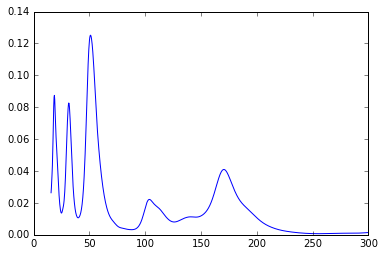

In [10]:
loss = calculateLossFunction(tlsdata[:1800], density, omega, tMatrix)
plt.plot(tMatrix, loss)

In [11]:
print(tlsdata.shape)

(6147L, 11L)


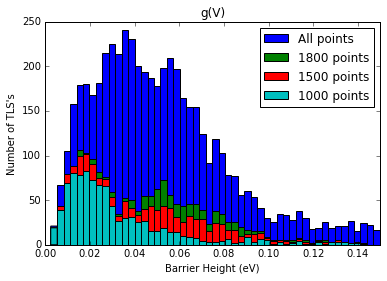

In [12]:
plt.hist(tlsdata[:,1], bins = 250, label = "All points")
plt.hist(tlsdata[:1800,1], bins = 250, label = "1800 points")
plt.hist(tlsdata[:1500,1], bins = 250, label = "1500 points")
plt.hist(tlsdata[:1000,1], bins = 250, label = "1000 points")
plt.legend()
plt.xlim([0,0.15])
plt.xlabel("Barrier Height (eV)")
plt.ylabel("Number of TLS's")
plt.title("g(V)")

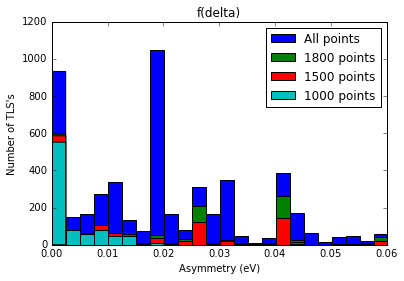

In [13]:
plt.hist(tlsdata[:,0], bins = 250, label = "All points")
plt.hist(tlsdata[:1800,0], bins = 250, label = "1800 points")
plt.hist(tlsdata[:1500,0], bins = 250, label = "1500 points")
plt.hist(tlsdata[:1000,0], bins = 250, label = "1000 points")
plt.legend()
plt.xlim([0,0.06])
plt.xlabel("Asymmetry (eV)")
plt.ylabel("Number of TLS's")
plt.title("f(delta)")

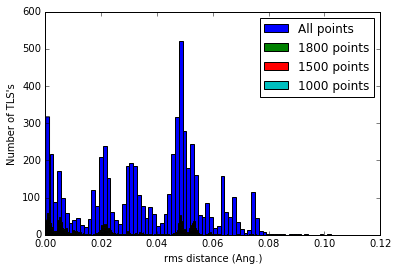

In [14]:
plt.hist(tlsdata[:,2], bins = 75, label = "All points")
plt.hist(tlsdata[:1800,2], bins = 250, label = "1800 points")
plt.hist(tlsdata[:1500,2], bins = 250, label = "1500 points")
plt.hist(tlsdata[:1000,2], bins = 250, label = "1000 points")
plt.legend()
#plt.xlim([0,0.15])
plt.xlabel("rms distance (Ang.)")
plt.ylabel("Number of TLS's")

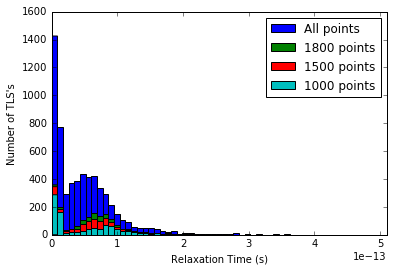

In [15]:
plt.hist(tlsdata[:,5], bins = 250, label = "All points")
plt.hist(tlsdata[:1800,5], bins = 250, label = "1800 points")
plt.hist(tlsdata[:1500,5], bins = 250, label = "1500 points")
plt.hist(tlsdata[:1000,5], bins = 250, label = "1000 points")
plt.legend()
plt.xlim([0,0.51e-12])
plt.xlabel("Relaxation Time (s)")
plt.ylabel("Number of TLS's")

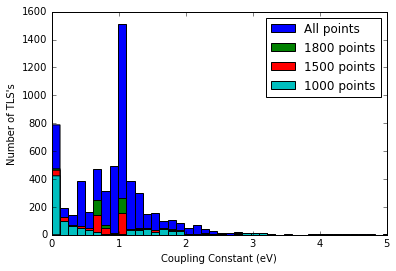

In [16]:
plt.hist(tlsdata[:,7], bins = 250, label = "All points")
plt.hist(tlsdata[:1800,7], bins = 250, label = "1800 points")
plt.hist(tlsdata[:1500,7], bins = 250, label = "1500 points")
plt.hist(tlsdata[:1000,7], bins = 250, label = "1000 points")
plt.legend()
plt.xlim([0,5])
plt.xlabel("Coupling Constant (eV)")
plt.ylabel("Number of TLS's")